In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wragling**

**Gathering Data**

In [ ]:
disnaker_df = pd.read_csv("/content/Disnaker.csv")
print(disnaker_df.shape)
print(disnaker_df)

(23, 7)
                                               Uraian Satuan 2021 2022 2023  \
0                                       Pencari Kerja    NaN  NaN  NaN  NaN   
1                       Jumlah Pencari Keja Laki-Laki  Orang  316  435  599   
2                      Jumlah Pencari Kerja Perempuan  Orang  252  321  499   
3   Penempatan Tenaga Kerja Berdasarkan Tingkat Pe...    NaN  NaN  NaN  NaN   
4     Jumlah Penempatan Tenaga Kerja Tidak Bersekolah  Orang    -    -    -   
5   Jumlah Penempatan Tenaga Kerja Tamatan SD dan ...  Orang    -    2    9   
6   Jumlah Penempatan Tenaga Kerja Tamatan SMP dan...  Orang    2   20   16   
7   Jumlah Penempatan Tenaga Kerja Tamatan SMA dan...  Orang   55  496  368   
8   Jumlah Penempatan Tenaga Kerja Tamatan Diploma...  Orang    8   73   29   
9        Jumlah Penempatan Tenaga Kerja Tamatan S1,S2  Orang   17  126  240   
10       Pencari Kerja Berdasarkan Tingkat Pendidikan    NaN  NaN  NaN  NaN   
11              Jumlah Pencari Kerja Tidak B

**Assessing Data**

In [ ]:
# Menampilkan informasi pada dataset
disnaker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Uraian  22 non-null     object
 1   Satuan  17 non-null     object
 2   2021    17 non-null     object
 3   2022    17 non-null     object
 4   2023    17 non-null     object
 5   2024    17 non-null     object
 6   Ket     17 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB


In [ ]:
# Memeriksa missing value
disnaker_df.isna().sum()

,0
Uraian,1
Satuan,6
2021,6
2022,6
2023,6
2024,6
Ket,6


In [ ]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", disnaker_df.duplicated().sum())

Jumlah duplikasi:  0


**Cleaning Data**

In [ ]:
# Menghapus kolom dan baris yang tidak diperlukan
disnaker_df = disnaker_df.drop(columns=["Satuan", "Ket"])
disnaker_df = disnaker_df.drop(index=[0, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 20, 21, 22])
print(disnaker_df)

                                             Uraian 2021 2022 2023 2024
1                     Jumlah Pencari Keja Laki-Laki  316  435  599  221
2                    Jumlah Pencari Kerja Perempuan  252  321  499  155
11            Jumlah Pencari Kerja Tidak Bersekolah    -    -    -    -
12    Jumlah Pencari Kerja Tamatan SD dan Sederajat    4   10   33    7
13  Jumlah PPencari Kerja Tamatan SMP dan Sederajat   12   10   62    6
14   Jumlah Pencari Kerja Tamatan SMA dan Sederajat  344  270  700  192
15    Jumlah Pencari Kerja Tamatan Diploma I/II/III   64   77   85   47
16               Jumlah Pencari Kerja Tamatan S1,S2  144  237  218  124
19      Jumlah Tenaga Kerja di Luar Negeri Terdidik    1    3   22   19


In [ ]:
# Mengubah nama baris
disnaker_df.loc[13, "Uraian"] = "Jumlah Pencari Kerja Tamatan SMP dan Sederajat"
print(disnaker_df)

                                            Uraian 2021 2022 2023 2024
1                    Jumlah Pencari Keja Laki-Laki  316  435  599  221
2                   Jumlah Pencari Kerja Perempuan  252  321  499  155
11           Jumlah Pencari Kerja Tidak Bersekolah    -    -    -    -
12   Jumlah Pencari Kerja Tamatan SD dan Sederajat    4   10   33    7
13  Jumlah Pencari Kerja Tamatan SMP dan Sederajat   12   10   62    6
14  Jumlah Pencari Kerja Tamatan SMA dan Sederajat  344  270  700  192
15   Jumlah Pencari Kerja Tamatan Diploma I/II/III   64   77   85   47
16              Jumlah Pencari Kerja Tamatan S1,S2  144  237  218  124
19     Jumlah Tenaga Kerja di Luar Negeri Terdidik    1    3   22   19


In [ ]:
# Mengubah semua nama kolom menjadi string
disnaker_df.columns = disnaker_df.columns.map(str)

# # Mengubah nilai - menjadi 0
for col in disnaker_df.columns[1:]:  # Kolom selain 'Uraian'
    disnaker_df[col] = disnaker_df[col].replace("-", 0)
    disnaker_df[col] = pd.to_numeric(disnaker_df[col], errors='coerce')

print(disnaker_df)

                                            Uraian  2021  2022  2023  2024
1                    Jumlah Pencari Keja Laki-Laki   316   435   599   221
2                   Jumlah Pencari Kerja Perempuan   252   321   499   155
11           Jumlah Pencari Kerja Tidak Bersekolah     0     0     0     0
12   Jumlah Pencari Kerja Tamatan SD dan Sederajat     4    10    33     7
13  Jumlah Pencari Kerja Tamatan SMP dan Sederajat    12    10    62     6
14  Jumlah Pencari Kerja Tamatan SMA dan Sederajat   344   270   700   192
15   Jumlah Pencari Kerja Tamatan Diploma I/II/III    64    77    85    47
16              Jumlah Pencari Kerja Tamatan S1,S2   144   237   218   124
19     Jumlah Tenaga Kerja di Luar Negeri Terdidik     1     3    22    19


In [ ]:
# Save data clean
disnaker_df.to_csv('disnaker_clean.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Melihat Jumlah Pencari Kerja Tiap Tahun
tahun_terakhir = disnaker_df.columns[-4:]

# Filter baris untuk pencari kerja laki-laki dan perempuan
df_pencarikerjalaki = disnaker_df[disnaker_df["Uraian"].str.contains("Laki", case=False)]
df_pencarikerjaperempuan = disnaker_df[disnaker_df["Uraian"].str.contains("Perempuan", case=False)]

# Hitung total laki-laki dan perempuan per tahun (4 tahun terakhir)
total_laki_per_tahun = df_pencarikerjalaki[tahun_terakhir].astype(int).sum()
total_perempuan_per_tahun = df_pencarikerjaperempuan[tahun_terakhir].astype(int).sum()
total_keseluruhan_per_tahun = total_laki_per_tahun + total_perempuan_per_tahun

# Hitung total keseluruhan selama 4 tahun terakhir
total_laki = total_laki_per_tahun.sum()
total_perempuan = total_perempuan_per_tahun.sum()
total_keseluruhan = total_keseluruhan_per_tahun.sum()

# Buat DataFrame ringkasan total keseluruhan
tabel_total_ringkasan = pd.DataFrame({
    "Kategori": ["Pencari Kerja Laki-laki", "Pencari Kerja Perempuan", "Total Keseluruhan"],
    "Total 4 Tahun Terakhir": [total_laki, total_perempuan, total_keseluruhan]
})

# Buat DataFrame jumlah per tahun
tabel_per_tahun = pd.DataFrame({
    "Tahun": tahun_terakhir,
    "Total Laki-laki": total_laki_per_tahun.values,
    "Total Perempuan": total_perempuan_per_tahun.values,
    "Total Keseluruhan": total_keseluruhan_per_tahun.values
})

# Tampilkan tabel ringkasan total dan tabel per tahun
print("=== Total Keseluruhan Selama 4 Tahun Terakhir ===")
print(tabel_total_ringkasan)
print("\n=== Total Pencari Kerja Per Tahun ===")
print(tabel_per_tahun)

=== Total Keseluruhan Selama 4 Tahun Terakhir ===
                  Kategori  Total 4 Tahun Terakhir
0  Pencari Kerja Laki-laki                    1571
1  Pencari Kerja Perempuan                    1227
2        Total Keseluruhan                    2798

=== Total Pencari Kerja Per Tahun ===
  Tahun  Total Laki-laki  Total Perempuan  Total Keseluruhan
0  2021              316              252                568
1  2022              435              321                756
2  2023              599              499               1098
3  2024              221              155                376


In [ ]:
# Filter berdasarkan kata 'Tamatan' sebagai representasi pendidikan
df_pendidikan = disnaker_df[disnaker_df['Uraian'].str.contains('Tamatan', case=False, na=False)].copy()

# Ambil kolom tahun (khusus yang berupa angka/tahun)
tahun_kolom = [col for col in disnaker_df.columns if col.isdigit()]

# Pastikan nilai tahun berupa numerik
df_pendidikan[tahun_kolom] = df_pendidikan[tahun_kolom].apply(pd.to_numeric, errors='coerce')

# Hitung total per baris (per tingkat pendidikan)
df_pendidikan['Total'] = df_pendidikan[tahun_kolom].sum(axis=1)

# Set 'Uraian' sebagai index agar lebih rapi
df_pendidikan.set_index('Uraian', inplace=True)

# Tampilkan tabel akhir
print("=== Jumlah Pencari Kerja Berdasarkan Pendidikan per Tahun ===")
print(df_pendidikan[tahun_kolom + ['Total']])


=== Jumlah Pencari Kerja Berdasarkan Pendidikan per Tahun ===
                                                2021  2022  2023  2024  Total
Uraian                                                                       
Jumlah Pencari Kerja Tamatan SD dan Sederajat      4    10    33     7     54
Jumlah Pencari Kerja Tamatan SMP dan Sederajat    12    10    62     6     90
Jumlah Pencari Kerja Tamatan SMA dan Sederajat   344   270   700   192   1506
Jumlah Pencari Kerja Tamatan Diploma I/II/III     64    77    85    47    273
Jumlah Pencari Kerja Tamatan S1,S2               144   237   218   124    723


In [ ]:
# Melihat TKI dari Kota Lubuk Linggau per tahunnya
# Filter baris yang mengandung "Tenaga Kerja di Luar Negeri"
df_ln = disnaker_df[disnaker_df["Uraian"].str.contains("Tenaga Kerja di Luar Negeri", case=False, na=False)].copy()

# Ambil hanya kolom tahun (yang berupa angka)
tahun_kolom = [col for col in disnaker_df.columns if col.isdigit()]

# Ubah ke numerik
df_ln[tahun_kolom] = df_ln[tahun_kolom].apply(pd.to_numeric, errors='coerce')

# Hitung total tenaga kerja luar negeri per tahun
total_ln_pertahun = df_ln[tahun_kolom].sum()

# Buat DataFrame dari hasil per tahun
tabel_ln = pd.DataFrame({
    "Tahun": total_ln_pertahun.index,
    "Jumlah": total_ln_pertahun.values
})

# Tambahkan baris total keseluruhan
total_keseluruhan = total_ln_pertahun.sum()
tabel_ln.loc[len(tabel_ln.index)] = ["Total", total_keseluruhan]

# Tampilkan hasil
print("=== Jumlah Tenaga Kerja di Luar Negeri dari Kota Lubuk Linggau ===")
print(tabel_ln)

=== Jumlah Tenaga Kerja di Luar Negeri dari Kota Lubuk Linggau ===
   Tahun  Jumlah
0   2021       1
1   2022       3
2   2023      22
3   2024      19
4  Total      45


=== Matriks Korelasi Antar Tahun ===
          2021      2022      2023      2024
2021  1.000000  0.938952  0.992503  0.982199
2022  0.938952  1.000000  0.906016  0.977420
2023  0.992503  0.906016  1.000000  0.958435
2024  0.982199  0.977420  0.958435  1.000000


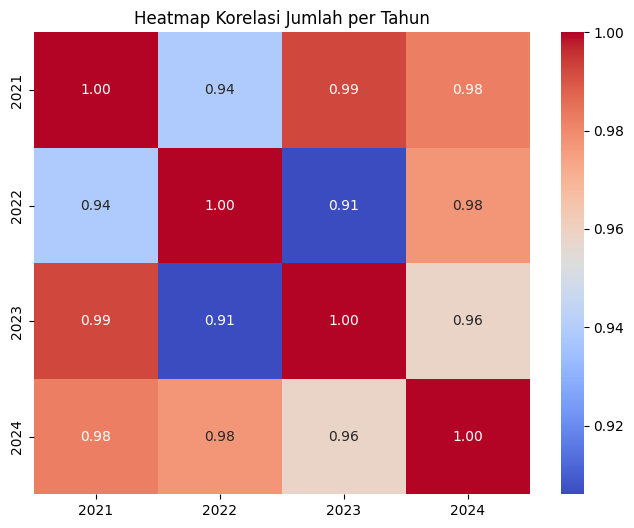

In [ ]:
# Hitung korelasi antar tahun
korelasi_tahun = disnaker_df[tahun_kolom].corr(method='pearson')

# Tampilkan matriks korelasi dalam bentuk tabel
print("=== Matriks Korelasi Antar Tahun ===")
print(korelasi_tahun)

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(korelasi_tahun, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Jumlah per Tahun")
plt.show()

# **Visualization & Explanatory Analysis**

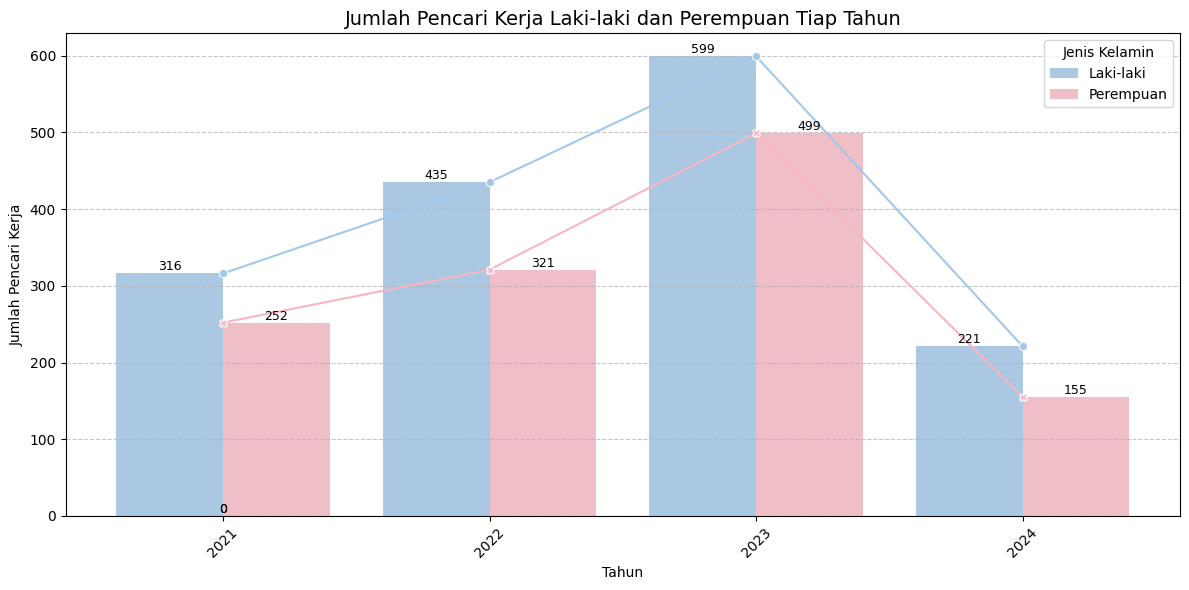

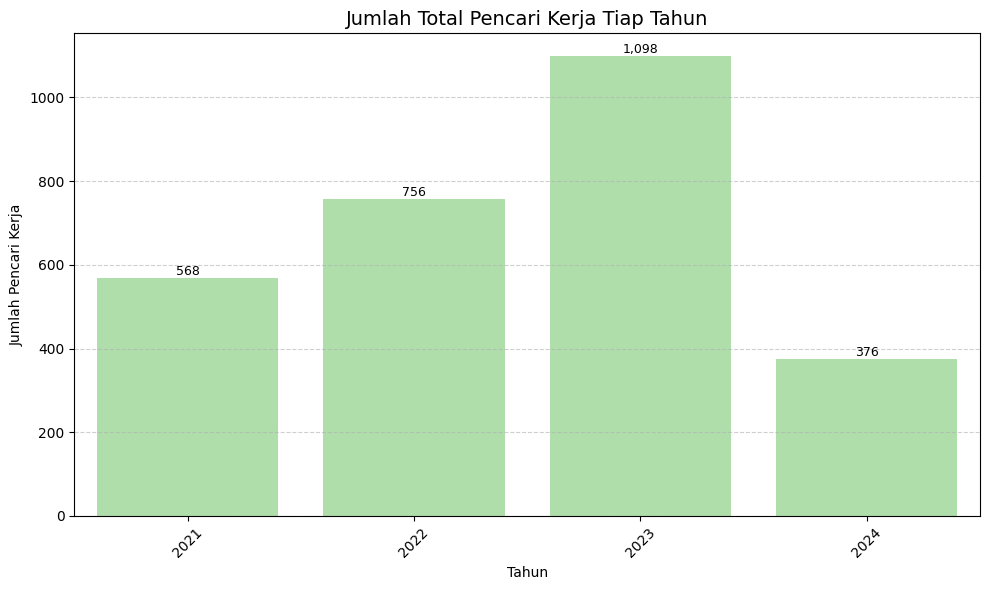

In [ ]:
# Visualisasi Jumlah Pencari Kerja Tiap Tahun
# Ambil kolom tahun
tahun_kolom = [col for col in disnaker_df.columns if col.isdigit()]

# Fungsi hitung total per jenis kelamin
def total_per_jenis_kelamin(keyword):
    df = disnaker_df[disnaker_df["Uraian"].str.contains(keyword, case=False)]
    return df[tahun_kolom].astype(int).sum()

# Hitung total per tahun
total_laki = total_per_jenis_kelamin("Laki")
total_perempuan = total_per_jenis_kelamin("Perempuan")

# Buat DataFrame
df_total = pd.DataFrame({
    "Tahun": tahun_kolom,
    "Laki-laki": total_laki.values,
    "Perempuan": total_perempuan.values
})

# === Grafik Pencari Kerja Laki-laki dan Perempuan ===
df_long = df_total.melt(id_vars="Tahun", var_name="Jenis Kelamin", value_name="Jumlah")

plt.figure(figsize=(12, 6))
bar = sns.barplot(data=df_long, x="Tahun", y="Jumlah", hue="Jenis Kelamin",
                  palette={"Laki-laki": "#A2C8EC", "Perempuan": "#F7B6C2"})

# Tambah garis tren
sns.lineplot(data=df_long, x="Tahun", y="Jumlah", hue="Jenis Kelamin",
             style="Jenis Kelamin", markers=True, dashes=False,
             palette={"Laki-laki": "#A2C8EC", "Perempuan": "#F7B6C2"}, legend=False)

# Tambah label
for p in bar.patches:
    height = p.get_height()
    bar.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=9, color='black')

plt.title("Jumlah Pencari Kerja Laki-laki dan Perempuan Tiap Tahun", fontsize=14)
plt.ylabel("Jumlah Pencari Kerja")
plt.xlabel("Tahun")
plt.xticks(rotation=45)
plt.legend(title="Jenis Kelamin")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Grafik Total Keseluruhan Tiap Tahun ===
df_total["Total"] = df_total["Laki-laki"] + df_total["Perempuan"]

plt.figure(figsize=(10, 6))
bar_total = sns.barplot(data=df_total, x="Tahun", y="Total", color='#A8E6A3')

for p in bar_total.patches:
    height = p.get_height()
    bar_total.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=9, color='black')

plt.title("Jumlah Total Pencari Kerja Tiap Tahun", fontsize=14)
plt.ylabel("Jumlah Pencari Kerja")
plt.xlabel("Tahun")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

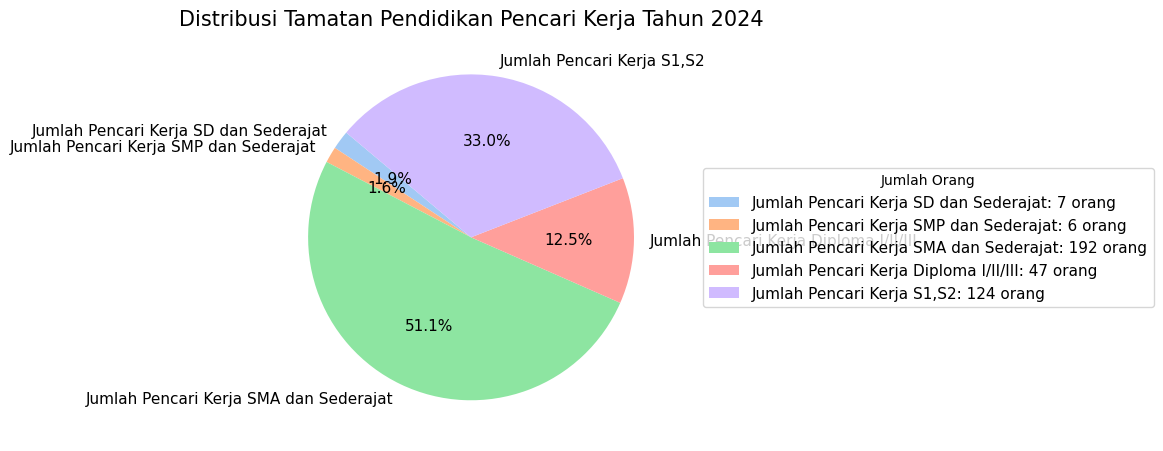

In [ ]:
# Visualisasi Pendidikan Pencari Kerja Pada Tahun 2024
data_2024 = df_pendidikan['2024'].copy()
data_2024 = data_2024[data_2024 > 0]  # Filter hanya yang > 0

# Persiapan label dan warna
labels = data_2024.index
sizes = data_2024.values
colors = sns.color_palette("pastel")[0:len(labels)]

# Buat label pendek tanpa awalan "Tamatan"
short_labels = [label.replace("Tamatan ", "") for label in labels]

# Ukuran lebih besar agar diagram dominan
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=short_labels,  # Label tanpa "Tamatan"
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11}
)

# Ubah warna teks persentase
for autotext in autotexts:
    autotext.set_color('black')

# Tambahkan legenda di samping kanan
plt.legend(
    labels=[f"{label}: {int(jml):,} orang" for label, jml in zip(short_labels, sizes)],
    title="Jumlah Orang",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=11
)

# Judul
plt.title("Distribusi Tamatan Pendidikan Pencari Kerja Tahun 2024", fontsize=15)
plt.tight_layout()
plt.show()


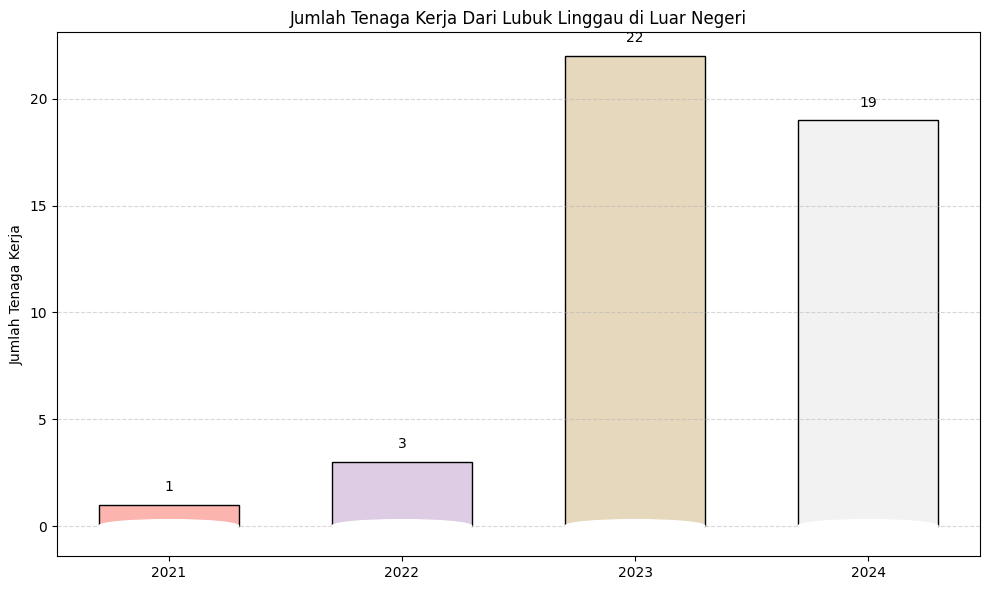

In [ ]:
# Visualisasi Jumlah TKI dari Lubuk Linggau
# Data jumlah tenaga kerja luar negeri terdidik tiap tahunnya
data = {
    '2021': 1,
    '2022': 3,
    '2023': 22,
    '2024': 19
}

# Membuat DataFrame
df = pd.DataFrame(list(data.items()), columns=['Tahun', 'Jumlah'])

# Membuat diagram inovatif (3D-style cylindrical bars)
fig, ax = plt.subplots(figsize=(10, 6))

# Posisi batang
x = np.arange(len(df))
y = df['Jumlah'].values

# Warna batang
colors = plt.cm.Pastel1(np.linspace(0, 1, len(df)))

# Gambar batang dengan efek silinder
for i in range(len(df)):
    ax.bar(x[i], y[i], color=colors[i], edgecolor='black', width=0.6)
    circle = plt.Circle((x[i], 0), 0.3, color='white', fill=True, zorder=5)
    ax.add_patch(circle)

# Atur sumbu dan label
ax.set_xticks(x)
ax.set_xticklabels(df['Tahun'])
ax.set_ylabel("Jumlah Tenaga Kerja")
ax.set_title("Jumlah Tenaga Kerja Dari Lubuk Linggau di Luar Negeri")

# Tambahkan label jumlah di atas batang
for i in range(len(df)):
    ax.text(x[i], y[i] + 0.5, f"{y[i]}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()